<a href="https://colab.research.google.com/github/prog815/portfOptim/blob/master/%D0%9F%D0%B5%D1%80%D0%B2%D1%8B%D0%B9_%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B8%D0%B9_%D0%BF%D0%BE%D1%80%D1%82%D1%84%D0%B5%D0%BB%D1%8C_MOEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка библиотек

In [1]:
! pip install bt
! pip install git+https://github.com/prog815/progGA

     |████████████████████████████████| 2.7MB 2.9MB/s 
  Created wheel for bt: filename=bt-0.2.7-cp36-cp36m-linux_x86_64.whl size=533299 sha256=7f5ce4b99ed452261cacafc762d9aac54ad51bce2a128c639ef7a7cf00aaaff4
  Stored in directory: /root/.cache/pip/wheels/ae/8a/a2/a679757e4e7219e6f17727d1422d4ce32da847678c6559da35
  Created wheel for ffn: filename=ffn-0.3.4-cp36-none-any.whl size=22813 sha256=13321067dbff415aa84e581d08cd5527a98a3a1c6cf3a78ba572a8178f1c0fec
  Stored in directory: /root/.cache/pip/wheels/20/08/4d/921180e81279d147cb6399fe1e194f2c67a796df86f9f4c5fe
Successfully built bt ffn
  Cloning https://github.com/prog815/progGA to /tmp/pip-req-build-1rifutp6
  Running command git clone -q https://github.com/prog815/progGA /tmp/pip-req-build-1rifutp6
  Created wheel for progGA: filename=progGA-0.0.7-cp36-none-any.whl size=3733 sha256=6a099aa6bb12ddede20a72042d73c98aaf128d726ec8eafb5364535581304cc8
  Stored in directory: /tmp/pip-ephem-wheel-cache-t3lptq5q/wheels/9c/7a/cc/d1ffa9ccaa42b

In [2]:
import bt
from progGA import ListGenetic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import os


fn = '/content/drive/My Drive/prog/model_prpmoex_08.11.2020.pkl'

/usr/local/lib/python3.6/dist-packages/ffn/core.py:27: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


# Загрузка истории

In [3]:
ticks="""TGKA.ME
VTBR.ME
HYDR.ME
TGKD.ME
MRKV.ME
MRKZ.ME
TGKDP.ME
MRKC.ME
NMTP.ME
NLMK.ME
MTLR.ME
AFLT.ME
FESH.ME
TRMK.ME
RTKM.ME
AMEZ.ME
DVEC.ME
RASP.ME
RTKMP.ME
LSNG.ME
BSPB.ME
NKNCP.ME
LSNGP.ME
KMAZ.ME
CHEP.ME
MRKK.ME
KUBE.ME
ROSB.ME""".split()
print(ticks)

['TGKA.ME', 'VTBR.ME', 'HYDR.ME', 'TGKD.ME', 'MRKV.ME', 'MRKZ.ME', 'TGKDP.ME', 'MRKC.ME', 'NMTP.ME', 'NLMK.ME', 'MTLR.ME', 'AFLT.ME', 'FESH.ME', 'TRMK.ME', 'RTKM.ME', 'AMEZ.ME', 'DVEC.ME', 'RASP.ME', 'RTKMP.ME', 'LSNG.ME', 'BSPB.ME', 'NKNCP.ME', 'LSNGP.ME', 'KMAZ.ME', 'CHEP.ME', 'MRKK.ME', 'KUBE.ME', 'ROSB.ME']


In [4]:
#data = bt.get('AAPL,AAL,GE,F',start='2010-01-01')
data = bt.get(ticks,start='2010-01-01')
lenData = len(data)
data

,tgkame,vtbrme,hydrme,tgkdme,mrkvme,mrkzme,tgkdpme,mrkcme,nmtpme,nlmkme,mtlrme,afltme,feshme,trmkme,rtkmme,amezme,dvecme,raspme,rtkmpme,lsngme,bspbme,nkncpme,lsngpme,kmazme,chepme,mrkkme,kubeme,rosbme
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-03-03,0.014108,0.054735,0.810952,0.01160,-0.396597,0.198611,0.005556,0.549784,1.890153,44.008575,682.319519,37.158562,9.40,92.702675,82.227699,12.800,0.878,157.361053,30.512236,24.167328,82.698944,1.945989,11.003892,72.700180,47.446537,120.942375,124.124344,118.975998
2010-03-04,0.014727,0.054807,0.814040,0.01210,-0.406614,0.208310,0.005732,0.550893,1.896474,43.704449,675.628540,36.956253,9.31,92.154686,82.574821,12.300,0.885,160.845917,30.243368,24.009184,83.526543,1.973754,11.007599,73.600899,47.146908,120.560188,124.208542,118.843002
2010-03-05,0.014658,0.055381,0.821452,0.01210,-0.422265,0.212023,0.005909,0.542579,1.925132,45.029915,690.834473,37.124844,9.34,93.072403,82.569145,12.648,0.898,169.263046,30.306385,24.734207,84.796074,1.946592,11.189351,74.648659,47.523190,118.936348,124.781181,117.206001
2010-03-09,0.015140,0.056158,0.833187,0.01210,-0.418821,0.208462,0.006526,0.556989,1.897739,46.750309,696.495422,36.733704,9.40,90.550316,84.099884,12.650,0.890,171.987610,31.192808,24.329523,85.478523,1.959872,11.148137,73.545746,47.453503,118.346596,125.050644,116.359001
2010-03-10,0.016035,0.055737,0.847393,0.01310,-0.409118,0.206643,0.006834,0.555326,1.959690,45.774353,687.999390,36.659519,9.28,91.580276,84.555115,12.920,0.895,169.806152,30.970146,24.613371,85.559258,1.952628,11.148137,72.415260,47.007538,118.240189,129.682144,121.832001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-30,0.010580,0.032660,0.722100,0.00367,0.067400,0.048600,0.004940,0.298400,7.845000,185.820007,54.150002,57.200001,9.54,56.060001,92.699997,4.190,0.856,111.040001,82.000000,5.020000,43.459999,72.680000,146.000000,57.700001,211.500000,24.840000,64.900002,77.400002
2020-11-02,0.011320,0.032760,0.729500,0.00373,0.067000,0.048600,0.004980,0.299600,7.910000,188.479996,55.459999,56.500000,9.43,57.240002,92.470001,4.180,0.859,112.000000,82.949997,5.050000,43.599998,73.599998,144.699997,57.900002,212.000000,24.520000,64.500000,77.199997
2020-11-03,0.011050,0.032920,0.732600,0.00376,0.067300,0.049300,0.004980,0.299600,7.925000,190.380005,55.849998,58.400002,9.77,57.779999,93.279999,4.210,0.853,114.180000,84.199997,5.060000,44.189999,75.199997,149.149994,58.000000,216.000000,24.760000,65.599998,78.000000


In [5]:
dData = data.to_returns()
dData

,tgkame,vtbrme,hydrme,tgkdme,mrkvme,mrkzme,tgkdpme,mrkcme,nmtpme,nlmkme,mtlrme,afltme,feshme,trmkme,rtkmme,amezme,dvecme,raspme,rtkmpme,lsngme,bspbme,nkncpme,lsngpme,kmazme,chepme,mrkkme,kubeme,rosbme
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-04,0.043902,0.001327,0.003808,0.043103,0.025257,0.048836,0.031746,0.002016,0.003344,-0.006911,-0.009806,-0.005444,-0.009574,-0.005911,0.004221,-0.039062,0.007973,0.022146,-0.008812,-0.006544,0.010007,0.014268,0.000337,0.012389,-0.006315,-0.003160,0.000678,-0.001118
2010-03-05,-0.004673,0.010468,0.009105,0.000000,0.038491,0.017825,0.030769,-0.015091,0.015111,0.030328,0.022506,0.004562,0.003222,0.009958,-0.000069,0.028293,0.014689,0.052330,0.002084,0.030198,0.015199,-0.013762,0.016512,0.014236,0.007981,-0.013469,0.004610,-0.013774
2010-03-09,0.032864,0.014031,0.014286,0.000000,-0.008154,-0.016798,0.104478,0.026558,-0.014229,0.038206,0.008194,-0.010536,0.006424,-0.027098,0.018539,0.000158,-0.008909,0.016097,0.029249,-0.016361,0.008048,0.006822,-0.003683,-0.014775,-0.001466,-0.004959,0.002159,-0.007227
2010-03-10,0.059091,-0.007500,0.017050,0.082645,-0.023169,-0.008724,0.047195,-0.002985,0.032645,-0.020876,-0.012198,-0.002020,-0.012766,0.011374,0.005413,0.021344,0.005618,-0.012684,-0.007138,0.011667,0.000944,-0.003696,0.000000,-0.015371,-0.009398,-0.000899,0.037037,0.047035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-30,-0.016729,-0.002748,-0.006467,-0.008108,-0.001482,-0.006135,0.004065,0.000000,-0.002543,0.026063,-0.013661,0.020699,0.028017,-0.029432,-0.001616,-0.041190,-0.006961,0.000360,-0.010856,-0.005941,0.002306,-0.009539,-0.000685,-0.015358,0.007143,0.009756,0.007764,0.010444
2020-11-02,0.069943,0.003062,0.010248,0.016349,-0.005935,0.000000,0.008097,0.004021,0.008286,0.014315,0.024192,-0.012238,-0.011530,0.021049,-0.002481,-0.002387,0.003505,0.008646,0.011585,0.005976,0.003221,0.012658,-0.008904,0.003466,0.002364,-0.012882,-0.006163,-0.002584
2020-11-03,-0.023852,0.004884,0.004249,0.008043,0.004478,0.014403,0.000000,0.000000,0.001896,0.010081,0.007032,0.033628,0.036055,0.009434,0.008760,0.007177,-0.006985,0.019464,0.015069,0.001980,0.013532,0.021739,0.030753,0.001727,0.018868,0.009788,0.017054,0.010363


# Поиск гиперпараметров

## Целевая функция

In [6]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

def getQualityMethod(lookback=100,lag=10):

    randPoint = np.random.randint(2*lag+lookback+1,lenData-1-3*lag)

    s = bt.Strategy('лучший', [bt.algos.RunEveryNPeriods(1,offset=lookback+1),
                            bt.algos.SelectAll(),
                            bt.algos.WeighMeanVar(lookback=pd.DateOffset(days=lookback)),
                            bt.algos.Rebalance()])
    test = bt.Backtest(s, data[(randPoint-lookback-1):(randPoint+lag)],progress_bar=False)

    s_eq = bt.Strategy('равновесный', [bt.algos.RunEveryNPeriods(1,offset=lookback+1),
                                    bt.algos.SelectAll(),
                                    bt.algos.WeighEqually(),
                                    bt.algos.Rebalance()])
    test_eq = bt.Backtest(s_eq, data[(randPoint-lookback-1):(randPoint+lag)],progress_bar=False)

    res = bt.run(test,test_eq)
    res = bt.ffn.calc_sharpe(res.prices.to_returns()[-lag:]).values
    
    # возвращаем разницу коэффициентов
    return res[0] - res[1]
    

getQualityMethod()

0.16714237079936958

## Создание модели

In [7]:
modelGA = ListGenetic(pop_size=200,
                      lookback=range(30,800),
                      quality_method=getQualityMethod)

if os.path.exists(fn):
    with open(fn,'rb') as fp:
        modelGA = pickle.load(fp)

## Бесконечный цикл поиска

In [ ]:
while True:
    modelGA.fit(100,echo_time=100)
    with open(fn,'wb') as fp:
        pickle.dump(modelGA,fp)

finish -  7555 {'quality': -0.585295678930907, 'lookback': 265}
finish -  7655 {'quality': 0.42563387441184797, 'lookback': 275}
finish -  7755 {'quality': -0.46393249434031514, 'lookback': 211}
finish -  7855 {'quality': -0.5625261381418281, 'lookback': 280}
finish -  7955 {'quality': -0.11869434251851153, 'lookback': 269}
finish -  8055 {'quality': 0.47617230681938666, 'lookback': 566}
finish -  8155 {'quality': 0.0818270747662106, 'lookback': 167}
finish -  8255 {'quality': 0.09409837077774472, 'lookback': 564}
finish -  8355 {'quality': 0.22091472113460586, 'lookback': 285}
finish -  8455 {'quality': 0.49886153342489514, 'lookback': 561}
finish -  8555 {'quality': -0.9181352460708119, 'lookback': 260}
finish -  8655 {'quality': -0.03649855034758426, 'lookback': 280}
finish -  8755 {'quality': -0.09726845351403726, 'lookback': 234}
finish -  8855 {'quality': -0.48173222954190814, 'lookback': 259}
finish -  8955 {'quality': -0.2123670148539749, 'lookback': 563}
finish -  9055 {'quali

## Графики

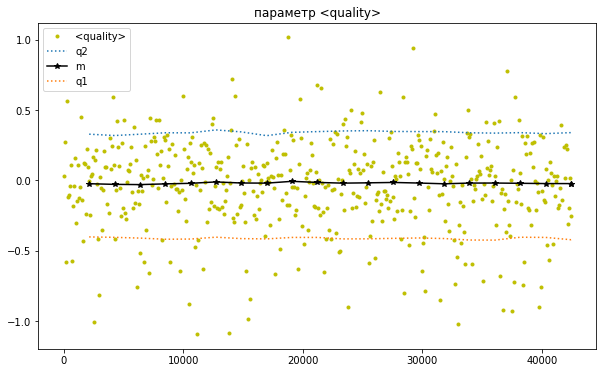

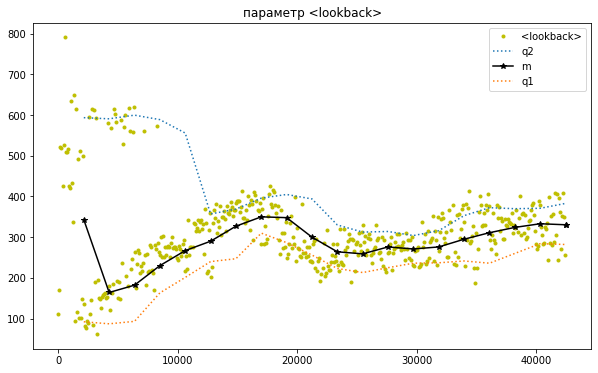

In [8]:
modelGA.plot_hist_new(('quality','lookback'))


## Параметры лучшей

In [9]:
best_par = modelGA.getBestParams()
best_par

{'lookback': 344}

# Прогон лучшей

In [10]:
lookback_best = best_par['lookback']

s_best = bt.Strategy('лучший', [bt.algos.RunEveryNPeriods(1,offset=lookback_best+1),
                                bt.algos.SelectAll(),
                                bt.algos.WeighMeanVar(lookback=pd.DateOffset(days=lookback_best)),
                                bt.algos.Rebalance()])
test_best = bt.Backtest(s_best, data)

s0 = bt.Strategy('равновесный', [bt.algos.RunEveryNPeriods(1,offset=lookback_best+1),
                                 bt.algos.SelectAll(),
                                 bt.algos.WeighEqually(),
                                 bt.algos.Rebalance()])
test0 = bt.Backtest(s0, data)

res_best = bt.run(test_best,test0)

лучший
0% [############################# ] 100% | ETA: 00:00:05равновесный
0% [############################# ] 100% | ETA: 00:00:00

## График баланса

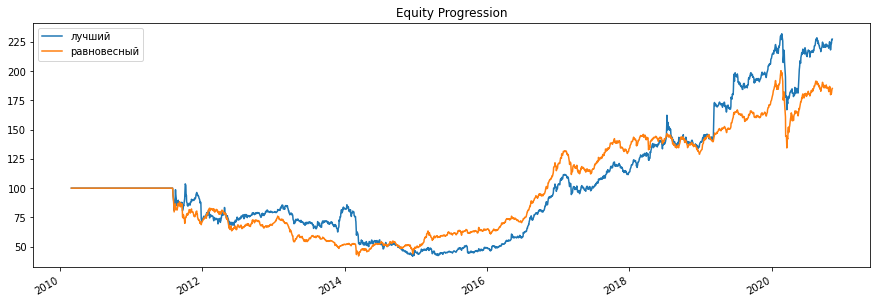

In [11]:
res_best.plot()

## график распределения долей

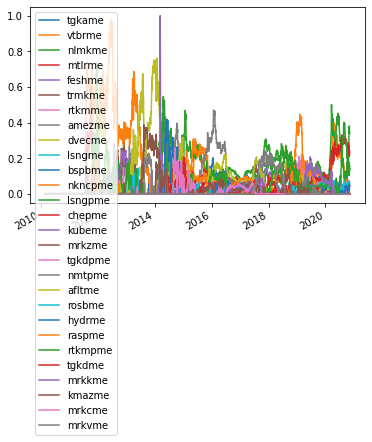

In [12]:
res_best.get_security_weights().plot()

## итог

In [13]:
res_best.display()

Stat                 лучший      равновесный
-------------------  ----------  -------------
Start                2010-03-02  2010-03-02
End                  2020-11-06  2020-11-06
Risk-free rate       0.00%       0.00%

Total Return         127.31%     85.19%
Daily Sharpe         0.46        0.43
Daily Sortino        0.72        0.62
CAGR                 7.99%       5.94%
Max Drawdown         -59.72%     -57.96%
Calmar Ratio         0.13        0.10

MTD                  2.19%       2.82%
3m                   2.66%       -1.13%
6m                   23.93%      12.22%
YTD                  7.77%       5.82%
1Y                   16.83%      14.09%
3Y (ann.)            23.84%      9.87%
5Y (ann.)            37.54%      23.93%
10Y (ann.)           8.56%       6.36%
Since Incep. (ann.)  7.99%       5.94%

Daily Sharpe         0.46        0.43
Daily Sortino        0.72        0.62
Daily Mean (ann.)    10.25%      7.28%
Daily Vol (ann.)     22.09%      16.76%
Daily Skew           0.01        -

Енин А.В.

Оренбург